# Understanding Naive Bayes Classifiers with Scikit-Learn

Naive Bayes classifiers are a family of simple, yet often surprisingly effective, probabilistic classifiers based on applying **Bayes' Theorem** with strong (naive) independence assumptions between the features.

They are particularly popular for text classification (like spam filtering or sentiment analysis) and work well even with high-dimensional datasets.

### Bayes' Theorem

At the heart of Naive Bayes is Bayes' Theorem, which describes the probability of an event based on prior knowledge of conditions that might be related to the event. For classification, we want to find the probability of a class (\(y\)) given a set of features (\(\mathbf{x} = (x_1, x_2, ..., x_n)\)). Bayes' Theorem states:

\[ P(y | x_1, ..., x_n) = \frac{P(x_1, ..., x_n | y) P(y)}{P(x_1, ..., x_n)} \]

Where:
*   \( P(y | x_1, ..., x_n) \) is the **posterior probability**: the probability of class \(y\) given the observed features \(\mathbf{x}\).
*   \( P(x_1, ..., x_n | y) \) is the **likelihood**: the probability of observing the features \(\mathbf{x}\) given that the class is \(y\).
*   \( P(y) \) is the **prior probability**: the initial probability of class \(y\) before observing any features.
*   \( P(x_1, ..., x_n) \) is the **evidence**: the probability of observing the features \(\mathbf{x}\). This acts as a normalizing constant.

### The "Naive" Assumption: Conditional Independence

Calculating the likelihood \( P(x_1, ..., x_n | y) \) directly is often computationally intractable, especially with many features. Naive Bayes simplifies this calculation by making a strong assumption: **all features are conditionally independent given the class \(y\)**.

This means we assume that the presence or value of a particular feature does not affect the presence or value of any other feature, given the class label. Mathematically:

\[ P(x_1, ..., x_n | y) = P(x_1 | y) P(x_2 | y) \dots P(x_n | y) = \prod_{i=1}^{n} P(x_i | y) \]

While this assumption is often violated in real-world data (features are rarely completely independent), Naive Bayes classifiers still tend to perform well in practice, especially when the independence assumption doesn't drastically impact the relative probabilities needed for classification.

### Classification Process

Using the naive independence assumption, the classification rule becomes:

1.  Calculate the prior probability \( P(y) \) for each class \(y\) from the training data (e.g., the proportion of training samples belonging to class \(y\)).
2.  Calculate the likelihood \( P(x_i | y) \) for each feature \(x_i\) given each class \(y\). The method for calculating this depends on the type of Naive Bayes used (see below).
3.  For a new data point \(\mathbf{x} = (x_1, ..., x_n)\), calculate the posterior probability (or a value proportional to it) for each class \(y\):
    \[ P(y | \mathbf{x}) \propto P(y) \prod_{i=1}^{n} P(x_i | y) \]
    (We can ignore the denominator \( P(/mathbf{x}) \) because it's the same for all classes and doesn't affect which class has the highest probability).
4.  Assign the data point \(\mathbf{x}\) to the class \(y\) that maximizes this value (Maximum A Posteriori or MAP estimation):
    \[ \hat{y} = \arg\max_{y} P(y) \prod_{i=1}^{n} P(x_i | y) \]

### Types of Naive Bayes Classifiers in Scikit-Learn

Scikit-learn implements several variants of Naive Bayes, differing mainly in the assumptions they make about the distribution of \( P(x_i | y) \):

1.  **Gaussian Naive Bayes (`GaussianNB`):**
    *   **Assumption:** Assumes that continuous features \(x_i\) follow a Gaussian (normal) distribution for each class \(y\).
    *   **Calculation:** The likelihood \( P(x_i | y) \) is calculated using the Gaussian probability density function, based on the mean and variance of feature \(x_i\) for samples belonging to class \(y\) in the training data.
    *   **Use Case:** Suitable for continuous numerical features that are approximately normally distributed (though it often works reasonably well even if this assumption is moderately violated).

2.  **Multinomial Naive Bayes (`MultinomialNB`):**
    *   **Assumption:** Assumes features represent counts or frequencies (e.g., word counts in a document).
    *   **Calculation:** The likelihood \( P(x_i | y) \) is estimated based on the frequency of feature \(x_i\) (e.g., word \(i\)) appearing in documents of class \(y\). It typically uses **Laplace (or Additive) smoothing** (controlled by the `alpha` parameter) to handle features that were not observed in the training data for a particular class (the zero-frequency problem).
    *   **Use Case:** Standard choice for text classification with word counts or TF-IDF vectors.

3.  **Bernoulli Naive Bayes (`BernoulliNB`):**
    *   **Assumption:** Assumes features are binary (0 or 1), indicating the presence or absence of a feature (e.g., whether a specific word appears in a document or not).
    *   **Calculation:** The likelihood \( P(x_i | y) \) is estimated based on the frequency of documents of class \(y\) that contain feature \(x_i\).
    *   **Use Case:** Suitable for binary/boolean features. Also used in text classification, particularly with binary term occurrence vectors (presence/absence) rather than term frequencies.

4.  **Complement Naive Bayes (`ComplementNB`):**
    *   An adaptation of Multinomial NB particularly suited for **imbalanced datasets**.

5.  **Categorical Naive Bayes (`CategoricalNB`):**
    *   Suitable for **discrete categorical features** where features follow a categorical distribution.

### Pros and Cons of Naive Bayes

**Pros:**
*   **Simple and Fast:** Very easy to implement and computationally efficient for both training and prediction.
*   **Requires Less Training Data:** Can perform well even with relatively small datasets compared to more complex models.
*   **Handles High Dimensions:** Works well with a large number of features (e.g., text classification with thousands of words).
*   **Good Performance:** Often works surprisingly well despite the naive independence assumption.
*   **Handles Irrelevant Features:** Tends to ignore irrelevant features naturally (their likelihoods \(P(x_i|y)\) will be similar across classes).

**Cons:**
*   **Naive Independence Assumption:** The core assumption of feature independence is often unrealistic and can limit accuracy if features are strongly correlated.
*   **Zero-Frequency Problem:** If a feature value in the test set was never seen with a particular class in the training set, the conditional probability \(P(x_i|y)\) will be zero, potentially zeroing out the entire posterior probability. Smoothing techniques (like Laplace) are needed to mitigate this (especially for Multinomial/Bernoulli NB).
*   **Sensitivity to Feature Distributions (Gaussian NB):** Gaussian NB assumes features are normally distributed, which might not hold true.
*   **Poor Probability Estimates:** While good at classification (picking the most likely class), the actual predicted probabilities might not be very accurate or well-calibrated due to the independence assumption.

### Implementation with Scikit-Learn (GaussianNB Example)

#### 1. Import Libraries

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Optional for GaussianNB, see note below
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.datasets import make_classification # To generate synthetic data

# Configure plots for better visualization
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except OSError:
    plt.style.use('ggplot') # Fallback style
    print("Style 'seaborn-v0_8-whitegrid' not found, using 'ggplot' instead.")

#### 2. Generate Data

We'll generate synthetic data suitable for Gaussian Naive Bayes (continuous features).

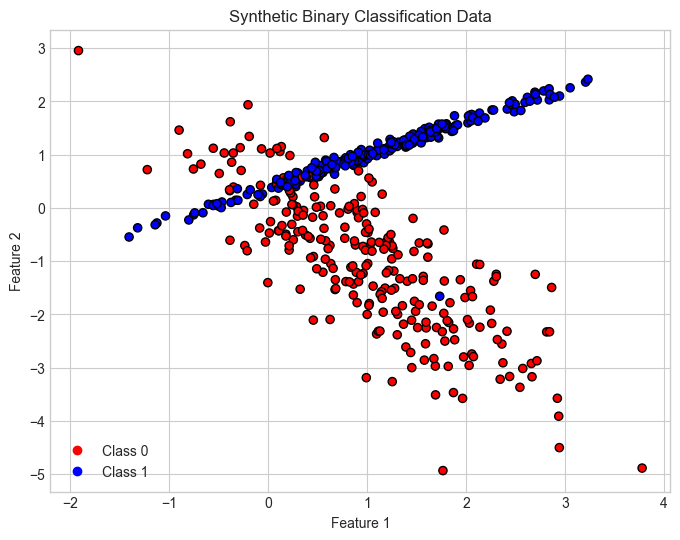

First 5 rows:
   Feature 1  Feature 2  Target
0   1.008455  -1.047010       0
1   0.326021   0.502541       1
2   1.024205  -1.797143       0
3   0.121880   1.059371       0
4   0.039100   0.382369       1


In [2]:
# Generate synthetic classification data (2 features for visualization)
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42, class_sep=1.0)

# Visualize the generated data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k', s=35)
plt.title('Synthetic Binary Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
handles, labels = scatter.legend_elements()
plt.legend(handles=handles, labels=['Class 0', 'Class 1'])
plt.show()

# Convert to DataFrame (optional)
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y
print("First 5 rows:")
print(df.head())

#### 3. Train/Test Split

In [3]:
# Split the dataset into Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 375 samples
Test set size: 125 samples


#### 4. Feature Scaling (Generally Not Required, but Consider for GaussianNB)

Naive Bayes algorithms (especially Multinomial and Bernoulli) typically do **not** require feature scaling. They work based on probabilities and counts, not distances.

However, for **Gaussian Naive Bayes**, which calculates means and variances, features with very large values might dominate the variance calculation. While not strictly necessary like for SVM or Logistic Regression, scaling *can* sometimes stabilize the variance calculation or slightly improve performance if features have vastly different scales. We'll apply it here for demonstration, but be aware it's often skipped.

In [4]:
# Feature Scaling (Optional for GaussianNB)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling applied (using StandardScaler).")
# To run without scaling, simply use X_train and X_test directly in the fit/predict steps.

Feature scaling applied (using StandardScaler).


#### 5. Training the Gaussian Naive Bayes Model

We'll use scikit-learn's `GaussianNB`. It has few hyperparameters to tune compared to other models. The main one is `var_smoothing` which adds a small value to the variances for calculation stability (similar to Laplace smoothing but for variances).

In [5]:
# Create and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model on the (optionally scaled) training data
gnb.fit(X_train_scaled, y_train)

print(f"Gaussian Naive Bayes model trained.")
print(f"Classes learned: {gnb.classes_}")
print(f"Class priors P(y): {gnb.class_prior_}")
# You can also inspect gnb.theta_ (means) and gnb.var_ (variances) per class

Gaussian Naive Bayes model trained.
Classes learned: [0 1]
Class priors P(y): [0.49866667 0.50133333]


#### 6. Making Predictions

In [6]:
# Predict the Test set results (class labels)
y_pred = gnb.predict(X_test_scaled)

# Predict probabilities
y_pred_proba = gnb.predict_proba(X_test_scaled)

# Display predictions vs actual values (optional)
results_df = pd.DataFrame({
    'Actual': y_test, 
    'Predicted Label': y_pred, 
    'Predicted Prob (Class 0)': y_pred_proba[:, 0],
    'Predicted Prob (Class 1)': y_pred_proba[:, 1]
})
print("\nFirst 10 predictions:")
print(results_df.head(10).round(4))


First 10 predictions:
   Actual  Predicted Label  Predicted Prob (Class 0)  Predicted Prob (Class 1)
0       1                1                    0.0854                    0.9146
1       0                0                    0.6712                    0.3288
2       1                1                    0.1094                    0.8906
3       1                1                    0.0942                    0.9058
4       0                0                    0.8636                    0.1364
5       1                1                    0.0858                    0.9142
6       1                1                    0.2936                    0.7064
7       0                0                    1.0000                    0.0000
8       0                0                    1.0000                    0.0000
9       0                0                    0.8331                    0.1669


#### 7. Evaluating the Model

In [7]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1]) # Use probabilities for class 1 for AUC

print("\n--- Model Evaluation (GaussianNB) ---")
print("Confusion Matrix:")
print(cm)
print(f"\nAccuracy: {acc:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)


--- Model Evaluation (GaussianNB) ---
Confusion Matrix:
[[52 10]
 [ 4 59]]

Accuracy: 0.8880
ROC AUC Score: 0.9483

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        62
           1       0.86      0.94      0.89        63

    accuracy                           0.89       125
   macro avg       0.89      0.89      0.89       125
weighted avg       0.89      0.89      0.89       125



#### 8. Visualizing the Decision Boundary (GaussianNB)

Since we used 2 features, we can visualize the decision boundary learned by the Gaussian Naive Bayes model. Unlike linear models, the boundary can be non-linear (typically quadratic).

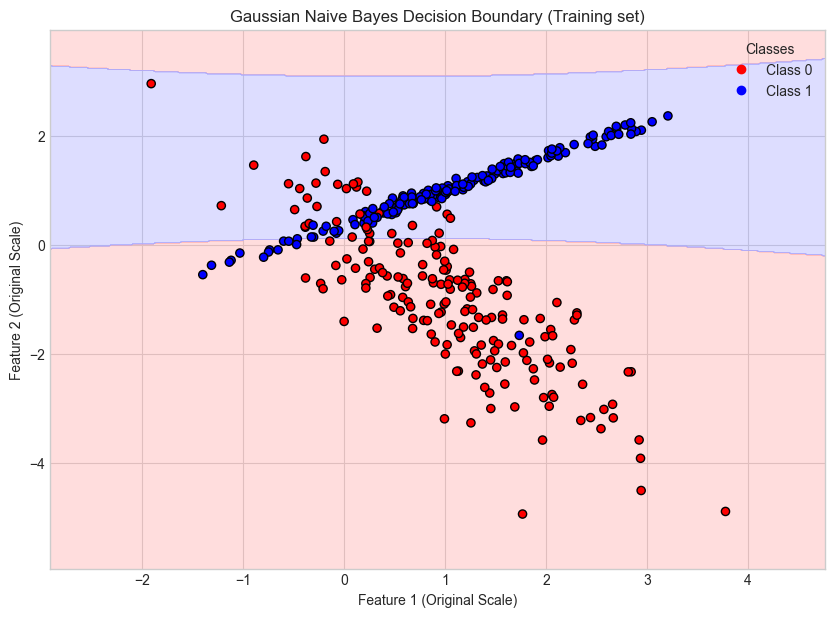

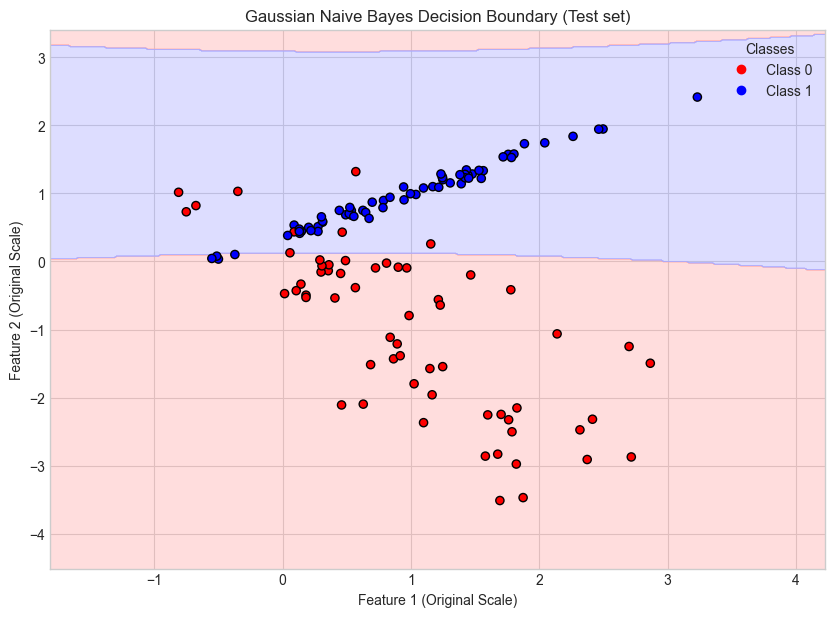

In [8]:
# Function to plot decision boundaries (reusable)
def plot_decision_boundary(X, y, model, scaler, title):
    X_set, y_set = X, y # Expecting scaled data
    
    # Create mesh grid using original data range, then scale it
    X_orig = scaler.inverse_transform(X_set)
    x_min, x_max = X_orig[:, 0].min() - 1, X_orig[:, 0].max() + 1
    y_min, y_max = X_orig[:, 1].min() - 1, X_orig[:, 1].max() + 1
    
    xx_orig, yy_orig = np.meshgrid(np.arange(x_min, x_max, 0.02),
                                   np.arange(y_min, y_max, 0.02))
    
    mesh_points = np.c_[xx_orig.ravel(), yy_orig.ravel()]
    mesh_points_scaled = scaler.transform(mesh_points)
    
    # Predict the class for each point in the scaled mesh grid
    Z = model.predict(mesh_points_scaled)
    Z = Z.reshape(xx_orig.shape)

    # Plot the contour and the data points (using original scale for axes)
    plt.figure(figsize=(10, 7))
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    plt.contourf(xx_orig, yy_orig, Z, alpha=0.4, cmap=cmap_light)
    plt.xlim(xx_orig.min(), xx_orig.max())
    plt.ylim(yy_orig.min(), yy_orig.max())

    # Plot the actual data points (using original scale)
    scatter = plt.scatter(X_orig[:, 0], X_orig[:, 1], c=y_set, cmap=cmap_bold, edgecolors='k', s=35)
    
    # Create legend
    handles, labels = scatter.legend_elements()
    plt.legend(handles=handles, labels=['Class 0', 'Class 1'], title="Classes")

    plt.title(title)
    plt.xlabel('Feature 1 (Original Scale)')
    plt.ylabel('Feature 2 (Original Scale)')
    plt.grid(True)
    plt.show()

# Plot for Training Set
plot_decision_boundary(X_train_scaled, y_train, gnb, scaler, 'Gaussian Naive Bayes Decision Boundary (Training set)')

# Plot for Test Set
plot_decision_boundary(X_test_scaled, y_test, gnb, scaler, 'Gaussian Naive Bayes Decision Boundary (Test set)')

The decision boundary reflects the regions where the posterior probability for one class becomes higher than for the other, based on the learned Gaussian distributions for each class.

### Conclusion

This notebook explored the Naive Bayes algorithm, focusing on the Gaussian variant.

Key takeaways:
*   Naive Bayes classifiers are based on **Bayes' Theorem** with a **naive assumption of feature independence**.
*   Different variants exist (`GaussianNB`, `MultinomialNB`, `BernoulliNB`, etc.) based on assumptions about feature distributions.
*   They are **simple, fast, and efficient**, especially for high-dimensional data like text.
*   **Feature scaling is generally not required**, although it might sometimes be considered for `GaussianNB`.
*   **Smoothing** (e.g., `alpha` in `MultinomialNB`/`BernoulliNB`, `var_smoothing` in `GaussianNB`) is important to handle unseen feature values or improve numerical stability.
*   Despite the often unrealistic independence assumption, Naive Bayes frequently provides good baseline performance for classification tasks.